In [1]:
import pickle
import numpy as np

In [2]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"].cpu().numpy()
y = data["labels"].cpu().numpy()
print(y.shape)

(49984,)


In [3]:
# normalize embeddings
x = (x - np.min(x)) / (np.max(x) - np.min(x))

In [4]:
embeddings = np.array(x)

In [5]:
# do PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(embeddings)

pca_transform = pca.transform(embeddings)

In [6]:
fine_labels = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

print(len(fine_labels))

100


In [19]:
# compute the centroid for each class
centroids = []
labels = []
for i in range(100):
    centroids.append(np.mean(pca_transform[y == i], axis=0))
    labels.append(i)

print(len(centroids))
print(labels)

100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [14]:

clusters = {}
parents = {}
curr_points = np.array(centroids.copy())
curr_labels = labels.copy()

for i in range(10):

    # calculate distances from the first centroid
    distances = np.linalg.norm(curr_points - curr_points[i], axis=1)

    # sort the distances and get the indices
    sorted_distances = np.argsort(distances)
    print("sorted", sorted_distances.dtype)

    # add to the cluster the 10 closest points but not itself
    clusters[i] = curr_points[sorted_distances.astype(int)[:10]]
    #print(clusters[i])    
    parents[i] = (np.array(curr_labels)[sorted_distances])[:10]
    print(parents[i])

    # delete the points from the list
    curr_points = np.delete(curr_points, sorted_distances[:10], axis=0)
    curr_labels = np.delete(curr_labels, sorted_distances[:10], axis=0)

    # add the new point to the list
    #curr_points = np.vstack((curr_points, new_point_mean))
    print(curr_points.shape)



sorted int64
[ 0 29  5 61 16 22 94 25 43 34]
(90, 2)
sorted int64
[ 2 51 54 84 83  8 88  6 62 48]
(80, 2)
sorted int64
[ 4 27 99 93 91 63 80 55 65 64]
(70, 2)
sorted int64
[ 9 40 82 97 28 21 87 86 46 39]
(60, 2)
sorted int64
[11 35 98 41 53 70 92 57 10 24]
(50, 2)
sorted int64
[14 26 45 78  7  1 79 36 20 44]
(40, 2)
sorted int64
[19 58 15 13 47 85 81 31 17 37]
(30, 2)
sorted int64
[38 75 32  3 66 42 33 18 72 56]
(20, 2)
sorted int64
[67 74 73 30 50 77 95 23 69 71]
(10, 2)
sorted int64
[96 59 52 90 60 12 49 68 76 89]
(0, 2)


In [15]:
print(parents)

{0: array([ 0, 29,  5, 61, 16, 22, 94, 25, 43, 34]), 1: array([ 2, 51, 54, 84, 83,  8, 88,  6, 62, 48]), 2: array([ 4, 27, 99, 93, 91, 63, 80, 55, 65, 64]), 3: array([ 9, 40, 82, 97, 28, 21, 87, 86, 46, 39]), 4: array([11, 35, 98, 41, 53, 70, 92, 57, 10, 24]), 5: array([14, 26, 45, 78,  7,  1, 79, 36, 20, 44]), 6: array([19, 58, 15, 13, 47, 85, 81, 31, 17, 37]), 7: array([38, 75, 32,  3, 66, 42, 33, 18, 72, 56]), 8: array([67, 74, 73, 30, 50, 77, 95, 23, 69, 71]), 9: array([96, 59, 52, 90, 60, 12, 49, 68, 76, 89])}


In [16]:
reverse = {}

for key in parents.keys():
    for i in range(len(parents[key])):
        reverse[parents[key][i]] = key

print(reverse)


{0: 0, 29: 0, 5: 0, 61: 0, 16: 0, 22: 0, 94: 0, 25: 0, 43: 0, 34: 0, 2: 1, 51: 1, 54: 1, 84: 1, 83: 1, 8: 1, 88: 1, 6: 1, 62: 1, 48: 1, 4: 2, 27: 2, 99: 2, 93: 2, 91: 2, 63: 2, 80: 2, 55: 2, 65: 2, 64: 2, 9: 3, 40: 3, 82: 3, 97: 3, 28: 3, 21: 3, 87: 3, 86: 3, 46: 3, 39: 3, 11: 4, 35: 4, 98: 4, 41: 4, 53: 4, 70: 4, 92: 4, 57: 4, 10: 4, 24: 4, 14: 5, 26: 5, 45: 5, 78: 5, 7: 5, 1: 5, 79: 5, 36: 5, 20: 5, 44: 5, 19: 6, 58: 6, 15: 6, 13: 6, 47: 6, 85: 6, 81: 6, 31: 6, 17: 6, 37: 6, 38: 7, 75: 7, 32: 7, 3: 7, 66: 7, 42: 7, 33: 7, 18: 7, 72: 7, 56: 7, 67: 8, 74: 8, 73: 8, 30: 8, 50: 8, 77: 8, 95: 8, 23: 8, 69: 8, 71: 8, 96: 9, 59: 9, 52: 9, 90: 9, 60: 9, 12: 9, 49: 9, 68: 9, 76: 9, 89: 9}


In [20]:
# for each embedding fint the closest centroid

a = np.zeros((10,100))


for i, x in enumerate(pca_transform):
    distances = np.linalg.norm(centroids - x, axis=1)
    first_index = np.argsort(distances)[0]    
    a[reverse[first_index]][y[i]] += 1

    

(100, 2)


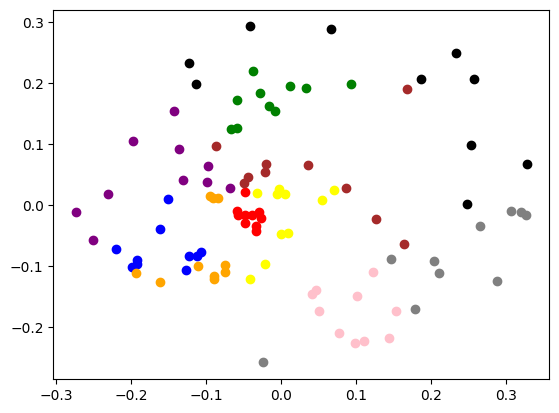

In [21]:
## do PCA on the centroids

pca_centroids = PCA(n_components=2)
pca_centroids.fit(centroids)

pca_centroids_transform = pca_centroids.transform(centroids)

print(pca_centroids_transform.shape)

# plot the centroids

import matplotlib.pyplot as plt

# color each centroid with the color of the parent cluster

colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'pink', 'brown', 'black', 'grey']

for i in range(100):
    plt.scatter(pca_centroids_transform[i,0], pca_centroids_transform[i,1], color=colors[reverse[i]])

plt.show()

In [22]:
print(y.shape)
print(np.max(y))

(49984,)
99


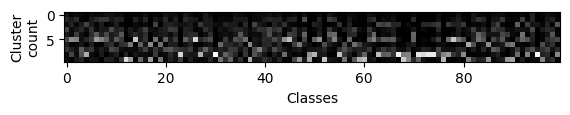

In [23]:

import matplotlib.pyplot as plt

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
#plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(centroids.shape[0]))
plt.imshow(a,cmap='Greys_r')

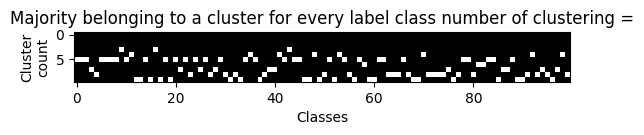

In [24]:
## majority voting for each class
b = np.argmax(a, axis=0)

c = np.zeros((10,100))
for x in range(100):    
    c[b[x]][x] = 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Majority belonging to a cluster for every label class number of clustering =")
plt.imshow(c, cmap='Greys_r')

In [25]:
np.sum(c, axis=1)

array([ 0.,  0.,  0.,  3.,  8., 31.,  3., 11., 22., 22.])

In [26]:
false_negative = np.ma.array(a,mask=c)
sum_fn = np.sum(false_negative)
print(sum_fn/y.shape[0])

0.62738076184379
